## The Central Limit Theorem

##### An introduction to the Central Limit Theorem using simulation

#### What is the Central Limit Theorem

The Central Limit Theorem (CLT) ia a powerful statistical tool that is useful in quantifying uncertainty around a sample mean estimates. It is also the basis for common hypothesis test, such as Z and t-test. A formal proof of the CLT requires some complex math, but will demonstrate it using a simulation.

#### Building intuition for the CLT

Imagine that a data scientist wants to know the average hourly wage for all working U.S. adults who make under 150 dollars per hour. This is a very large population -it would be unrealistic to collect wage data for every person meeting these creteria. Instead, suppose that the data scientist surveys a randon sample of 150 people, records each person's hourly wage, and calculates a sample mean of 17.74 dollars per hour. Here´s and histogram of this sample, with a black dotted line at 17.74:

![Alt text](https://content.codecademy.com/articles/the-central-limit-theorem/samp1_dens.svg)

A good data scientist knows that this sample mean is not EXACTLY the same as the population mean, but hopes that it is close ENOUGH. The next question is:
- How far from the population mean could this sample mean realistically be?

To answer this, let's temporarily pretend that we are all-knowing and can actually inspect the hourly wages of all people in the population of interest. Suppose that the true average wage is 18.84 dollars per hour and a histogram of the full population looks like this:

![Alt text](https://content.codecademy.com/articles/the-central-limit-theorem/pop_dens2.svg)

In real life, we usually only observe a single sample - but in order to quantify our uncertainty about that sample, it is useful to think about what would happen if we could observe more. Consider the following thought experiment: imagine that we could take some large number (say, 10000) randon sample of 150 people from the population and calculate the mean hourly wage for each of those samples. We could then inspect the 10000 sample means to see how much they vary. A large amount of variation would make us less confident that any individual sample mean is representative of the population; less variation would make us more confident.

The Python code below does this in a loop. The <span style="color:yellow">population</span> object is a list containing all wages in the full population. In each iteration of the loop we do the following:
- take a random sample of 150 wages from the population
- store the sample mean in a list called sample_means

Finally, after collecting 10,000 sample means, we can inspect them using a histogram.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

population = np.random.normal(18.84, 2, size = 100000)

sample_means = []

for i in range(10000):
    samp = np.random.choice(population, 150, replace=False)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins=30)
plt.axvline(np.mean(sample_means),color='r', linestyle='dashed')


![Alt text](https://content.codecademy.com/articles/the-central-limit-theorem/samp_dist.svg)

There are few interesting things to notice about this distribution, which is called the sampling distribution of the mean:
- Unlike the population distribution, which is very right-skewed, this distribution is (almost) normally distributed: symmetric with a single mode.
- The average of the sample means (black dotted line) is aproximately equal to the population mean (18.84).
- The 10000 sample means range aproximately between 14 and 24 (plus or minus 5 dollars from the true mean).

Specifically, the <span style="color:lime">Numpy percentile()</span> function can be used to calculate that 95% of the sample means from the above simulation fall in a range from 16.14 to 21.87 dollars per hour (plus or minus around 2.87 dollars from the mean):

In [ ]:
percentiles = np.percentile(sample_means, [(2.5,97.5)])
print(percentiles)
# output: array([16.13810156, 21.87180969])

### Formally defining the CLT

It's now time to formally define the CLT, which tells us that the sampling distribution of the mean:
- is normally distributed (for large enough sample size)
- is centered at the population mean
- has standard deviation equal to the population standard deviation divided by the square root of the sample size. This is called Standard Error.

With respect to the standard error formula described above, note that there are two levers on the width of the sampling distribution:
- **The population standard deviation.** Populations with more variation will yield sample means with more variation. For example, imagine sampling the heights of 5 year olds compared to sampling heights of 5-18 years olds. There is more variation in the heights of 5-18 year olds, so there will be more variation in individual samples.
- **The sample size.** The larger the sample size, the smaller the variation in repeated sample means. In the wage example above, imagine sampling only five people instead of 150. Those five sampled people could include one outlier that throws the whole sample mean off. If we sample 150 (or even more) people, were more likely to have high and low outliers that cancel each other out.



To build your intuition, the following simulation may be helpful. We can use the random.normal() function from NumPy to generate a population of values with a particular standard deviation (pop_stdev) and mean (arbitrarily set to 10 in this example). As before, we can do the following:
- take random samples of some size (samp_size) from the population
- record the sample mean for each one
- plot a histogram of the sample means

> Try changing samp_size to any number between 2 and 20. Then, leaving samp_size = 2, try changing the value of pop_stdev to any number between 1 and 10 (higher values mean more variation in the population). Observe how higher values of samp_size and lower values of pop_stdev result in a skinnier distribution (smaller standard error).

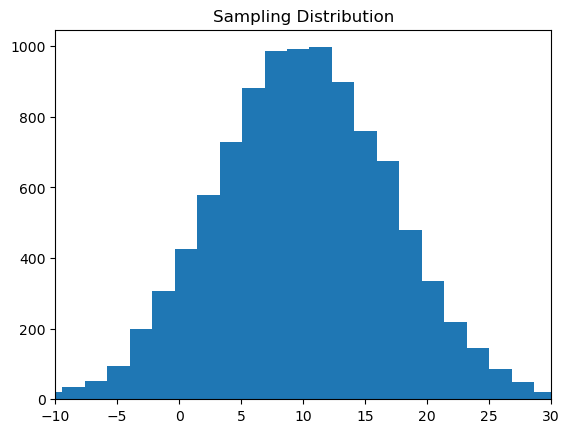

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

samp_size = 2
pop_stdev = 10

population = np.random.normal(loc=10, scale=pop_stdev, size=100000)
population = list(population)

sample_means = []

for i in range(10000):
    samp = random.sample(population, samp_size)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins=30)
plt.title('Sampling Distribution')
plt.xlim(-10, 30)
plt.show()

### How does this help the data scientist?

In real life, the data scientist is still stuck with their one sample mean as a best guess for the population mean. However, they can leverage the CLT to stimate the standard error -the amount of variation in imagined, repeated samples!

Remember that the CLT tells us that the standard error (SE) can be calculated as follows:

$$
SE = \frac {Population\ Standard\ Deviation}{\sqrt{Sample\ Size}}
$$

While a researcher or data scientist probably does not know the population standard deviation, they can use the standard deviation of their samples to estimate it.

Let's return to the data scientist who collected a single sample of 150 wages and calculated an average wage of 17.74 dollars. To quantify the uncertainty around this sample mean, this data scientist can first estimate the standard error:

In [ ]:
my_sample = 150
std_error = np.std(my_sample)/(my_sample**.5)
print(std_error)
# output: 1.275

Then, leveraging the part of the CLT that says the sampling distribution is normally distributed, our data scientist can use a nifty property of normal distributions: 95% of normally distributed values are within about 1.96 standard deviations of the mean. This allows the data scientist to estimate the width of the sampling distribution above, without actually knowing the population distribution.

First, the data scientist needs to multiply the estimated standard error by 1.96:
> 1.96 * 1.275 = 2.50
The interpretation is as follows:
- Imagine taking a large number of samples of size 150 from a population with the same amount of variation as in the observed sample.
- 95% of those samples would be within about 2.50 dollars from the true population mean.
- Therefore, there is about 95% probability that the observed sample mean of 17.74 is no more than 2.50 dollars away from the population mean. In other words, there is about 95% probability that the population mean is between 15.24 and 20.24. This is referred to as a  <span style="color:lime">95% confidence interval</span>.

Note that the estimate of 2.50 is similat to the value of 2.87 that we calculated as all-knowing beings with access to the full population. With only a single sample in hand, the data scientist can express the uncertainty in their sample mean fairly accurately.